In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from matplotlib import style
from sklearn import metrics
from plotly import graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [2]:
#final_df= pd.read_csv("final_df_1.csv")
hadar_df= pd.read_csv("hadar_df.csv")
#matam_to_hadar_df= pd.read_csv("matam_to_hadar_df.csv")
hadar_df1=hadar_df.head(20000)
distances= pd.read_csv("distances.csv")

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
len(hadar_df1)

20000

In [4]:
dict={}
for index, row in distances.iterrows():
    dict[row['hii']]=index
print(dict)

{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4, 'Hod HaCarmel': 5, 'Kiryat Ata': 6, 'Kiryat Byalik': 7, 'Kiryat Elieazer': 8, 'Kiryat Eliyahoo': 9, 'Kiryat Haim': 10, 'Matam': 11, 'Mifratz': 12, 'Newe Paz': 13, 'Newe Shaanan': 14, 'Ramat Begin': 15, 'Ramat Ben Gurion': 16, 'Ramat Eshkol': 17, 'Ramat Golda': 18, 'Ramat HaTishbi': 19, 'Ramat Sapir': 20, 'Romema': 21, 'Shambur': 22, 'University': 23, 'Ziv': 24}


In [12]:
hadar_df1.head()

Unnamed: 0  mac    src   dest  start_date    end_date start_time  end_time  \
0           0    1  bt163  bt165  11/01/2021  11/01/2021   09:42:00  09:43:00   
1      278690    1  bt165  bt163  11/01/2021  11/01/2021   10:43:00  10:44:00   
2      565906    1  bt154  bt143  11/01/2021  11/01/2021   11:42:00  12:02:00   
3       42058    1  bt151  bt149  11/01/2021  11/01/2021   13:02:00  13:04:00   
4     1410777    1  bt158  bt159  11/01/2021  11/01/2021   13:56:00  13:57:00   

                   from                    to     day travel_time  \
0  HaMoshava HaGermanit                 Hadar  Monday    00:01:00   
1                 Hadar  HaMoshava HaGermanit  Monday    00:01:00   
2         Kiryat Byalik               Mifratz  Monday    00:20:00   
3                 Hadar                 Hadar  Monday    00:02:00   
4           Kiryat Haim           Kiryat Haim  Monday    00:01:00   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN

In [18]:
hadar_df1.head()

mac    src   dest  start_date    end_date start_time  end_time  \
0    1  bt163  bt165  11/01/2021  11/01/2021   09:42:00  09:43:00   
1    1  bt165  bt163  11/01/2021  11/01/2021   10:43:00  10:44:00   
2    1  bt154  bt143  11/01/2021  11/01/2021   11:42:00  12:02:00   
3    1  bt151  bt149  11/01/2021  11/01/2021   13:02:00  13:04:00   
4    1  bt158  bt159  11/01/2021  11/01/2021   13:56:00  13:57:00   

                   from                    to     day  travel_time  
0  HaMoshava HaGermanit                 Hadar  Monday            1  
1                 Hadar  HaMoshava HaGermanit  Monday            1  
2         Kiryat Byalik               Mifratz  Monday           20  
3                 Hadar                 Hadar  Monday            2  
4           Kiryat Haim           Kiryat Haim  Monday            1

In [35]:
del hadar_df1['dur']
del hadar_df1['Unnamed: 0']
#del hadar_df1['end_time']
hadar_df1['start_time']=pd.to_datetime(hadar_df1['start_time'], format='%H:%M:%S').dt.hour
#hadar_df1['end_time']=pd.to_datetime(hadar_df1['end_time'], format='%H:%M:%S').dt.hour
hadar_df1.head()

mac    src   dest  start_date    end_date  start_time   from  \
0  1.0  bt165  bt163  11/01/2021  11/01/2021        10.0  Hadar   
1  1.0  bt151  bt149  11/01/2021  11/01/2021        13.0  Hadar   
2  1.0  bt149  bt100  11/01/2021  11/01/2021        16.0  Hadar   
3  1.0  bt108  bt139  11/02/2021  11/02/2021        20.0  Hadar   
4  1.0  bt108  bt158  11/03/2021  11/03/2021        23.0  Hadar   

                     to       day  min_duration  
0  HaMoshava HaGermanit    Monday           1.0  
1                 Hadar    Monday           2.0  
2                 Matam    Monday          19.0  
3                 Matam  Thursday          15.0  
4           Kiryat Haim  Thursday           7.0

In [21]:
hadar_df1 = hadar_df1[hadar_df1['travel_time'] <= 15 ]
len(hadar_df1)

18368

In [38]:
hadar_df1['min_duration'].mean()

3.4160632202475494

In [36]:
fig = go.Figure()
fig.add_trace(go.Box(name='min_duration', y=hadar_df1.min_duration, boxmean='sd'))

fig.update_traces(
    line_color='rgb(8,81,156)'
)
fig.show()

In [22]:
hadar_df1=hadar_df1.drop(hadar_df1[hadar_df1.eq('#VALUE!').any(1)].index)
hadar_df1=hadar_df1.drop(hadar_df1[hadar_df1.eq('#NUM!').any(1)].index) 
hadar_df1.dropna(inplace=True)

In [23]:
hadar_df1['dist']=0
hadar_df1['dist']=hadar_df1['dist'].astype(float)
hadar_df1 = hadar_df1.reset_index(drop=True)
hadar_df1.head()

mac    src   dest  start_date    end_date start_time  end_time  \
0    1  bt163  bt165  11/01/2021  11/01/2021   09:42:00  09:43:00   
1    1  bt165  bt163  11/01/2021  11/01/2021   10:43:00  10:44:00   
2    1  bt151  bt149  11/01/2021  11/01/2021   13:02:00  13:04:00   
3    1  bt158  bt159  11/01/2021  11/01/2021   13:56:00  13:57:00   
4    1  bt106  bt141  11/01/2021  11/01/2021   15:18:00  15:24:00   

                   from                    to     day  travel_time  dist  
0  HaMoshava HaGermanit                 Hadar  Monday            1   0.0  
1                 Hadar  HaMoshava HaGermanit  Monday            1   0.0  
2                 Hadar                 Hadar  Monday            2   0.0  
3           Kiryat Haim           Kiryat Haim  Monday            1   0.0  
4       HaEir HaTachtit              Newe Paz  Monday            6   0.0

In [24]:
for index, row in hadar_df1.iterrows():
    from_ = hadar_df1.iloc[index]["from"]
    #print(from_)
    to_ = hadar_df1.iloc[index]["to"]
    #print(to_)
    target_index = dict[to_]
    #print(distances.iloc[target_index][from_])
    hadar_df1.at[index,"dist"] = distances.iloc[target_index][from_]
    hadar_df1.at[index, "from"]= dict[from_]
    hadar_df1.at[index, "to"]= dict[to_]

In [25]:
hadar_df1.rename(columns = {'from':'fromm'}, inplace = True)
hadar_df1.head(10)

mac    src   dest  start_date    end_date start_time  end_time fromm  to  \
0    1  bt163  bt165  11/01/2021  11/01/2021   09:42:00  09:43:00     4   2   
1    1  bt165  bt163  11/01/2021  11/01/2021   10:43:00  10:44:00     2   4   
2    1  bt151  bt149  11/01/2021  11/01/2021   13:02:00  13:04:00     2   2   
3    1  bt158  bt159  11/01/2021  11/01/2021   13:56:00  13:57:00    10  10   
4    1  bt106  bt141  11/01/2021  11/01/2021   15:18:00  15:24:00     3  13   
5    1  bt158  bt121  11/01/2021  11/01/2021   20:27:00  20:36:00    10  24   
6    1  bt145  bt116  11/01/2021  11/01/2021   21:07:00  21:12:00     1   0   
7    1  bt121  bt158  11/01/2021  11/01/2021   22:10:00  22:21:00    24  10   
8    1  bt123  bt125  11/02/2021  11/02/2021   06:44:00  06:47:00    14  14   
9    1  bt114  bt119  11/02/2021  11/02/2021   16:32:00  16:46:00    17  21   

        day  travel_time  dist  
0    Monday            1   2.7  
1    Monday            1   2.7  
2    Monday            2   0.0  
3    Monday            1   0.0  
4    Monday            6   3.7  
5    Monday            9  12.0  
6    Monday            5   2.9  
7    Monday           11  12.0  
8  Thursday            3   0.0  
9  Thursday           14   2.5

In [26]:
day_dict={'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7}
hadar_df1=hadar_df1.replace({"day": day_dict})

In [28]:
dummy = pd.get_dummies(hadar_df1.start_time, prefix='start_time')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
hadar_df1 = pd.concat([hadar_df1,dummy], axis = 1)

# dummy = pd.get_dummies(hadar_df1.end_time, prefix='end_time')
# dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
# hadar_df1 = pd.concat([hadar_df1,dummy], axis = 1)

dummy = pd.get_dummies(hadar_df1.fromm, prefix='from')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
hadar_df1 = pd.concat([hadar_df1,dummy], axis = 1)

dummy = pd.get_dummies(hadar_df1.to, prefix='to')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
hadar_df1 = pd.concat([hadar_df1,dummy], axis = 1)

dummy = pd.get_dummies(hadar_df1.day, prefix='day')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
hadar_df1 = pd.concat([hadar_df1,dummy], axis = 1)

hadar_df1.head()

mac    src   dest  start_date    end_date  start_time  end_time fromm  to  \
0    1  bt163  bt165  11/01/2021  11/01/2021           9  09:43:00     4   2   
1    1  bt165  bt163  11/01/2021  11/01/2021          10  10:44:00     2   4   
2    1  bt151  bt149  11/01/2021  11/01/2021          13  13:04:00     2   2   
3    1  bt158  bt159  11/01/2021  11/01/2021          13  13:57:00    10  10   
4    1  bt106  bt141  11/01/2021  11/01/2021          15  15:24:00     3  13   

   day  ...  to_21  to_22  to_23  to_24  day_2  day_3  day_4  day_5  day_6  \
0    2  ...      0      0      0      0      1      0      0      0      0   
1    2  ...      0      0      0      0      1      0      0      0      0   
2    2  ...      0      0      0      0      1      0      0      0      0   
3    2  ...      0      0      0      0      1      0      0      0      0   
4    2  ...      0      0      0      0      1      0      0      0      0   

   day_7  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 89 columns]

In [183]:
hadar_df1['6.00-8.00']=0
for index, row in hadar_df1.iterrows():
    if hadar_df1['start_time_6.0'][index]==1  or hadar_df1['start_time_7.0'][index]==1:
        hadar_df1['6.00-8.00'][index]=1

C:\Users\user\AppData\Local\Temp/ipykernel_9488/4040768176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hadar_df1['6.00-8.00'][index]=1


In [184]:
hadar_df1['night_drive']=0
for index, row in hadar_df1.iterrows():
    if hadar_df1['start_time_1.0'][index]==1 or hadar_df1['start_time_2.0'][index]==1 or hadar_df1['start_time_3.0'][index]==1 or hadar_df1['start_time_4.0'][index]==1 or hadar_df1['start_time_5.0'][index]==1:
        hadar_df1['night_drive'][index]=1

C:\Users\user\AppData\Local\Temp/ipykernel_9488/4148436735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hadar_df1['night_drive'][index]=1


In [39]:
# copy the data
df_min_max_scaled = hadar_df1.copy()
  
# apply normalization techniques by Column 1
column = 'dist'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
(df_min_max_scaled)

mac    src   dest  start_date    end_date  start_time  end_time  \
4           1  bt106  bt141  11/01/2021  11/01/2021          15  15:24:00   
5           1  bt158  bt121  11/01/2021  11/01/2021          20  20:36:00   
6           1  bt145  bt116  11/01/2021  11/01/2021          21  21:12:00   
7           1  bt121  bt158  11/01/2021  11/01/2021          22  22:21:00   
9           1  bt114  bt119  11/02/2021  11/02/2021          16  16:46:00   
...       ...    ...    ...         ...         ...         ...       ...   
18363  101415  bt134  bt133  11/10/2021  11/10/2021           7  07:37:00   
18364  101415  bt158  bt118  11/10/2021  11/10/2021          17  17:23:00   
18365  101415  bt116  bt134  11/10/2021  11/10/2021          20  20:21:00   
18366  101415  bt142  bt149  11/11/2021  11/11/2021          14  14:58:00   
18367  101415  bt156  bt157  11/11/2021  11/11/2021          16  16:25:00   

      fromm  to  day  ...  to_21  to_22  to_23  to_24  day_2  day_3  day_4  \
4         3  13    2  ...      0      0      0      0      1      0      0   
5        10  24    2  ...      0      0      0      1      1      0      0   
6         1   0    2  ...      0      0      0      0      1      0      0   
7        24  10    2  ...      0      0      0      0      1      0      0   
9        17  21    5  ...      1      0      0      0      0      0      0   
...     ...  ..  ...  ...    ...    ...    ...    ...    ...    ...    ...   
18363    22  22    2  ...      0      1      0      0      1      0      0   
18364    10  16    2  ...      0      0      0      0      1      0      0   
18365     0  22    2  ...      0      1      0      0      1      0      0   
18366    12   2    5  ...      0      0      0      0      0      0      0   
18367     6   6    5  ...      0      0      0      0      0      0      0   

       day_5  day_6  day_7  
4          0      0      0  
5          0      0      0  
6          0      0      0  
7          0      0      0  
9          1      0      0  
...      ...    ...    ...  
18363      0      0      0  
18364      0      0      0  
18365      0      0      0  
18366      1      0      0  
18367      1      0      0  

[6738 rows x 89 columns]

In [40]:
df_min_max_scaled['dist']

4        0.194737
5        0.631579
6        0.152632
7        0.631579
9        0.131579
           ...   
18363    0.000000
18364    0.631579
18365    0.136842
18366    0.373684
18367    0.000000
Name: dist, Length: 6738, dtype: float64

In [185]:
del hadar_df1['start_time_1.0']
del hadar_df1['start_time_2.0']
del hadar_df1['start_time_3.0']
del hadar_df1['start_time_4.0']
del hadar_df1['start_time_5.0']
# del df_min_max_scaled['start_time_22.0']
# del df_min_max_scaled['start_time_23.0']
del hadar_df1['start_time_6.0']
del hadar_df1['start_time_7.0']

In [41]:
list(zip( range(0,len(hadar_df1.columns)),hadar_df1.columns))

[(0, 'mac'),
 (1, 'src'),
 (2, 'dest'),
 (3, 'start_date'),
 (4, 'end_date'),
 (5, 'start_time'),
 (6, 'end_time'),
 (7, 'fromm'),
 (8, 'to'),
 (9, 'day'),
 (10, 'travel_time'),
 (11, 'dist'),
 (12, 'start_time_1'),
 (13, 'start_time_2'),
 (14, 'start_time_3'),
 (15, 'start_time_4'),
 (16, 'start_time_5'),
 (17, 'start_time_6'),
 (18, 'start_time_7'),
 (19, 'start_time_8'),
 (20, 'start_time_9'),
 (21, 'start_time_10'),
 (22, 'start_time_11'),
 (23, 'start_time_12'),
 (24, 'start_time_13'),
 (25, 'start_time_14'),
 (26, 'start_time_15'),
 (27, 'start_time_16'),
 (28, 'start_time_17'),
 (29, 'start_time_18'),
 (30, 'start_time_19'),
 (31, 'start_time_20'),
 (32, 'start_time_21'),
 (33, 'start_time_22'),
 (34, 'start_time_23'),
 (35, 'from_1'),
 (36, 'from_2'),
 (37, 'from_3'),
 (38, 'from_4'),
 (39, 'from_5'),
 (40, 'from_6'),
 (41, 'from_7'),
 (42, 'from_8'),
 (43, 'from_9'),
 (44, 'from_10'),
 (45, 'from_11'),
 (46, 'from_12'),
 (47, 'from_13'),
 (48, 'from_14'),
 (49, 'from_15'),
 (5

In [42]:
Y = hadar_df1.iloc[:,10].values
X = hadar_df1.iloc[:,range(11,88)].values
#print("Let's append {} rows of 1's as the first column in the X array".format(X.shape[0]))
#X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
#print(X1.shape)

In [53]:
#X_opt = X1[:,range(0,75)]

In [149]:
corr_df = df_min_max_scaled.corr()
correlated = corr_df.min_duration.loc[(abs(corr_df.min_duration)>=0.1)]
correlated = correlated.drop(['min_duration']).index.tolist()
correlated

['dist', 'to_4', 'to_7', 'to_11']

In [143]:
X = df_min_max_scaled[correlated]
Y= df_min_max_scaled.min_duration


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=4, test_size=0.2)

In [45]:
#Linear regressor for the raw data
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

#Predict from the test features of raw data
y_pred = regressor.predict(X_test) 

#print(f"predicted response:\n{y_pred}")

#print(len(y_pred))

# x=0
# for i in range(len(y_pred)):
#     hefresh=y_pred[i]-y_test[i]
#     #print(hefresh)
#     if(-4<hefresh<4):
#         x=x+1
# print(x)
# print(x/len(y_pred)*100)

In [52]:
x=0
for i in range(len(y_pred)):
    if(y_test[i]!=0):
        hefresh=(y_pred[i]-y_test[i])/y_test[i]
        #print(y_test[i],y_pred[i],hefresh*100)
    if(-2<hefresh<2):
         x=x+1
print(x)
print(x/len(y_pred)*100)

108310
81.37674027213235


In [46]:
#Evaluate the regressor on the raw data
print('RMSE score for the Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR raw is : %.2f' % regressor.score(X_test, y_test))
print("\n")

RMSE score for the Multiple LR raw is : 3.6155742926275307
Variance score for the Multiple LR raw is : 0.08




In [50]:
print(X_test)

[[11.   0.   0.  ...  1.   0.   0. ]
 [16.   0.   0.  ...  0.   0.   0. ]
 [ 2.9  0.   0.  ...  0.   0.   0. ]
 ...
 [ 3.3  0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   1.   0. ]
 [ 0.   0.   0.  ...  1.   0.   0. ]]


In [168]:
hadar_df1.corr()

mac  start_time       day  min_duration      dist  \
mac              1.000000    0.053334  0.013748     -0.004428  0.036033   
start_time       0.053334    1.000000  0.014503     -0.028167  0.034253   
day              0.013748    0.014503  1.000000     -0.008729 -0.004749   
min_duration    -0.004428   -0.028167 -0.008729      1.000000  0.164164   
dist             0.036033    0.034253 -0.004749      0.164164  1.000000   
start_time_8.0  -0.006565   -0.249816 -0.020433      0.009246 -0.041817   
start_time_9.0  -0.021311   -0.184885  0.003239      0.009732 -0.020939   
start_time_10.0 -0.028855   -0.145781 -0.000951      0.005608  0.001005   
start_time_11.0 -0.011928   -0.097927  0.023153      0.016458  0.013716   
start_time_12.0 -0.000254   -0.050681  0.014586      0.008971  0.002529   
start_time_13.0 -0.011806    0.000575  0.013613     -0.012580  0.001910   
start_time_14.0  0.008369    0.050759  0.004573     -0.000464  0.004018   
start_time_15.0 -0.003085    0.106478  0.008874     -0.002219  0.011069   
start_time_16.0  0.002777    0.162790 -0.024932      0.008837  0.030954   
start_time_17.0  0.013634    0.213941 -0.010447     -0.014020  0.009540   
start_time_18.0  0.023063    0.240754 -0.004909     -0.015342 -0.000676   
start_time_19.0  0.010062    0.262712  0.002079     -0.018169 -0.001869   
start_time_20.0  0.020001    0.260728  0.007598     -0.010571 -0.011343   
start_time_21.0  0.015780    0.267665  0.022170      0.001603 -0.000787   
start_time_22.0  0.027921    0.284461  0.012079     -0.002201  0.021408   
start_time_23.0  0.013896    0.258990  0.012164     -0.017068  0.025427   
to_1             0.005922    0.004432 -0.004295      0.062126  0.019300   
to_2            -0.035985    0.020801 -0.000432     -0.094689 -0.704695   
to_3             0.016566   -0.024598  0.018119      0.021705 -0.096549   
to_4            -0.001455   -0.041940 -0.006108     -0.141378 -0.118287   
to_5             0.006361    0.005829 -0.007027      0.067417  0.024658   
to_6            -0.010655    0.018094  0.002505      0.092060  0.180565   
to_7            -0.001015    0.021630 -0.002204      0.115759  0.214048   
to_8             0.016296   -0.002144 -0.006206      0.005869  0.012835   
to_9             0.013391   -0.011429 -0.006405     -0.012305 -0.007823   
to_10            0.042110    0.053252 -0.008568      0.027162  0.763803   
to_11            0.027405   -0.014409  0.013042      0.190129  0.187268   
to_12           -0.046869   -0.015369 -0.002710     -0.001328  0.240851   
to_13            0.015982   -0.025401  0.003079      0.055492  0.000415   
to_14            0.003716   -0.009774  0.006075      0.110869  0.029452   
to_15            0.002889   -0.001574 -0.002300      0.018978  0.010028   
to_16           -0.022502   -0.017961 -0.006183      0.053835 -0.007727   
to_17           -0.000070    0.000084 -0.001369      0.074258  0.026956   
to_18            0.004063    0.002084 -0.000168      0.045266  0.028200   
to_19            0.012532    0.006653  0.009952      0.046746  0.004999   
to_20            0.006185   -0.011806 -0.009282      0.079828  0.017093   
to_21            0.008537   -0.001611  0.006328      0.064136  0.012636   
to_22            0.008021    0.003436 -0.000432      0.035827  0.008621   
to_23           -0.003979    0.000381  0.002045      0.064476  0.035277   
to_24           -0.000791    0.001057 -0.002218      0.078167  0.025252   
day_2           -0.004510   -0.005560 -0.395412     -0.004194  0.014416   
day_3           -0.017970   -0.019985 -0.122002      0.001217 -0.002524   
day_4           -0.004861    0.002068  0.049435     -0.013253  0.001523   
day_5           -0.010621    0.008956  0.303745      0.011348  0.010733   
day_6            0.008029   -0.012041  0.331657      0.011576 -0.014642   
day_7            0.025064    0.021786  0.633248     -0.018546 -0.005860   
6.00-8.00        0.005242   -0.437693 -0.053199      0.018413 -0.037525   
night_drive     -0.045487   -0.393553  0.019748

In [58]:
y_test.reshape(-1, 1)
y_pred.reshape(-1,1)

array([[3.35696936],
       [3.57878399],
       [2.76472616],
       ...,
       [3.51179838],
       [3.13615179],
       [3.00184584]])

In [59]:
y_test.size

133097

In [56]:
y_pred.size

133097

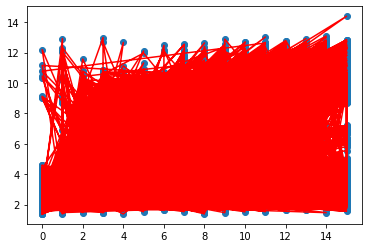

In [61]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_pred, color='red')
plt.show()